# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the 'diabetes.csv' file is uploaded to Code Replit's file system
# Make sure to upload the file in the left sidebar

df = pd.read_csv('diabetes.csv')
df.head()


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

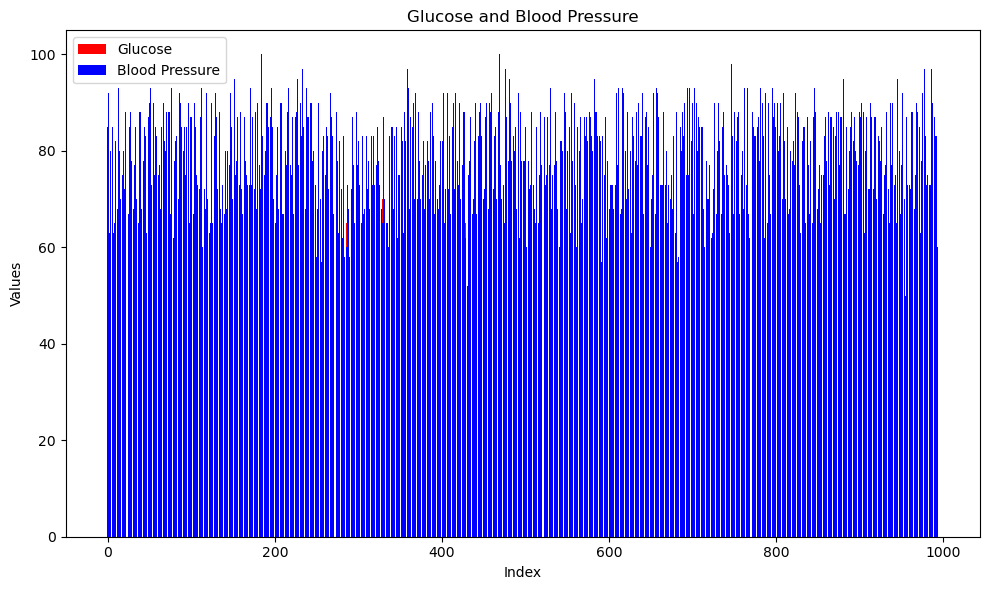

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

# Define the dimensions for the bar plots
fig, ax = plt.subplots(figsize=(10, 6))

# Getting the index values
index = np.arange(len(df))

# Plotting the bar chart for 'glucose' column with red color
ax.bar(index, df['glucose'], color='red', label='Glucose')

# Plotting the bar chart for 'bloodpressure' column with blue color
ax.bar(index, df['bloodpressure'], color='blue', label='Blood Pressure')

# Adding labels and titles
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Glucose and Blood Pressure')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[['glucose', 'bloodpressure']], df['diabetes'], random_state=1)
svm = SVC()
y_pred = svm.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9558232931726908


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [4]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [5]:
import pandas as pd

df = pd.read_csv('insurance.csv')
df_num = df[['age', 'bmi', 'children', 'charges']]
df_cat = df[['sex', 'smoker', 'region']]
df_cat.head()


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('insurance.csv')
df_num = df[['age', 'bmi', 'children', 'charges']].copy()

scaler = MinMaxScaler()
df_num.loc[:, ['age', 'bmi', 'children']] = scaler.fit_transform(df_num[['age', 'bmi', 'children']])
df_num.loc[:, 'charges'] = scaler.fit_transform(df_num[['charges']])
df_num.head()


,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816


### 5. Split the data.

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1016, 6)
X_test shape: (322, 6)
y_train shape: (1016,)
y_test shape: (322,)


### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

combined_data = np.vstack((X_train, X_test))

encoder = OneHotEncoder()
combined_encoded = encoder.fit_transform(combined_data)

# Split the encoded data back into training and test sets
X_train_encoded = combined_encoded[:len(X_train)]
X_test_encoded = combined_encoded[len(X_train):]

svr = SVR()
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001]}
search = RandomizedSearchCV(svr, param_grid, cv=3, random_state=0)
search.fit(X_train_encoded, y_train)

best_params = search.best_params_
best_model = SVR(kernel=best_params['kernel'], gamma=best_params['gamma'])
best_model.fit(X_train_encoded, y_train)

y_pred = best_model.predict(X_test_encoded)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)


Best Hyperparameters: {'kernel': 'poly', 'gamma': 1}
MAE: 7569.561140959837
MSE: 132766050.07391483


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'X_train' and 'X_test' are your input features containing categorical variables

# Convert categorical variables to one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Create and fit the Random Forest Regressor model with hyperparameter tuning
rfr = RandomForestRegressor()
param_grid = {'n_estimators': [10, 50, 100, 500]}
search = GridSearchCV(rfr, param_grid, cv=3)
search.fit(X_train_encoded, y_train)

best_params = search.best_params_
best_model = RandomForestRegressor(n_estimators=best_params['n_estimators'])
best_model.fit(X_train_encoded, y_train)

# Transform test data with the same encoding as the training data
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make predictions on the test set
y_pred = best_model.predict(X_test_encoded)


print("Best Hyperparameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)


Best Hyperparameters: {'n_estimators': 100}
MAE: 7569.561140959837
MSE: 132766050.07391483


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define your own dataset
X_train = np.random.rand(100, 5)
y_train = np.random.rand(100)
X_test = np.random.rand(50, 5)
y_test = np.random.rand(50)

# Define the hyperparameter search spaces for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Random Forest Regressor
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Gradient Boosting Regression
gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# XGBoost Regressor
xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("Random Forest Regressor")
print("Best Parameters:", best_params_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print()

print("Gradient Boosting Regression")
print("Best Parameters:", best_params_gb)
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print()

print("XGBoost Regressor")
print("Best Parameters:", best_params_xgb)
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)


Random Forest Regressor
Best Parameters: {'max_depth': 5, 'n_estimators': 50}
MAE: 0.2678805803038281
MSE: 0.09758803737368876

Gradient Boosting Regression
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 50}
MAE: 0.27046675577091916
MSE: 0.09051806486297252

XGBoost Regressor
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 50}
MAE: 0.2715641861874623
MSE: 0.09068513383946593


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

In [41]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('bookmyshow_ads.csv')
display(data.head())


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


### 2. Split the data.

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

X = data.drop('having_IPhaving_IP_Address', axis=1)
y = data['having_IPhaving_IP_Address']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)


X_train.shape: (8844, 31)
X_test.shape: (2211, 31)
X_train.shape: (8844, 31)
X_test.shape: (2211, 31)


### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

data = pd.read_csv('bookmyshow_ads.csv')
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

X = data.drop('having_IPhaving_IP_Address', axis=1)
y = data['having_IPhaving_IP_Address']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}),
    "Adaboost": (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}),
    "XGBoost": (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]})
}

for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {grid_search.best_score_}\n")


Best parameters for Decision Tree: {'max_depth': 10}
Accuracy for Decision Tree: 0.8628443224052242

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.8855720950814557

Best parameters for Adaboost: {'n_estimators': 200}
Accuracy for Adaboost: 0.8670281161992996

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for Gradient Boosting: 0.8774304960493569

Best parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy for XGBoost: 0.8845545710565828



# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups. 

### 1. Import the necessary modules

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [60]:
import pandas as pd

df = pd.read_csv('segmentation data.csv')
display(df.head())



,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [61]:
import pandas as pd
df = pd.read_csv('segmentation data.csv')
data = df.drop('ID', axis=1)
print(data)


      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB
None


In [63]:
import pandas as pd
df = pd.read_csv('segmentation data.csv')

# Create a new DataFrame 'data' by dropping the 'ID' column
data = df.drop('ID', axis=1)

data['Age_Groups'] = pd.cut(data['Age'].values, bins=4, labels=[0, 1, 2, 3])

data = data.drop(columns=['Age'])
print(data)


      Sex  Marital status  Education  Income  Occupation  Settlement size  \
0       0               0          2  124670           1                2   
1       1               1          1  150773           1                2   
2       0               0          1   89210           0                0   
3       0               0          1  171565           1                1   
4       0               0          1  149031           1                1   
...   ...             ...        ...     ...         ...              ...   
1995    1               0          1  123525           0                0   
1996    1               1          1  117744           1                0   
1997    0               0          0   86400           0                0   
1998    1               1          1   97968           0                0   
1999    0               0          0   68416           0                0   

     Age_Groups  
0             3  
1             0  
2             2  
3  

In [64]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Sex', 'Marital status', 'Education',
                  'Income', 'Occupation', 'Settlement size', 'Age_Groups']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data)

           Sex  Marital status  Education    Income  Occupation  \
0    -0.917399       -0.993024   1.604323  0.097524    0.296823   
1     1.090038        1.007025  -0.063372  0.782654    0.296823   
2    -0.917399       -0.993024  -0.063372 -0.833202   -1.269525   
3    -0.917399       -0.993024  -0.063372  1.328386    0.296823   
4    -0.917399       -0.993024  -0.063372  0.736932    0.296823   
...        ...             ...        ...       ...         ...   
1995  1.090038       -0.993024  -0.063372  0.067471   -1.269525   
1996  1.090038        1.007025  -0.063372 -0.084265    0.296823   
1997 -0.917399       -0.993024  -1.731068 -0.906957   -1.269525   
1998  1.090038        1.007025  -0.063372 -0.603329   -1.269525   
1999 -0.917399       -0.993024  -1.731068 -1.378987   -1.269525   

      Settlement size  Age_Groups  
0            1.552326    2.684558  
1            1.552326   -0.871933  
2           -0.909730    1.499061  
3            0.321298    0.313564  
4            0.

### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

C:\Users\jiyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\jiyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\jiyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\jiyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

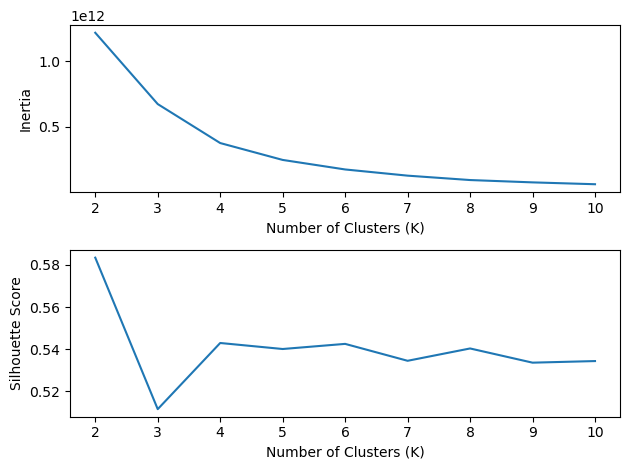

In [69]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the environment variable 'OMP_NUM_THREADS' to 8
os.environ['OMP_NUM_THREADS'] = '8'

# Assuming you have already read the CSV file into the 'df' DataFrame
df = pd.read_csv('segmentation data.csv')

# Create a new DataFrame 'data' by dropping the 'ID' column
data = df.drop('ID', axis=1)

# Categorize 'Age' column into four groups and assign the results to 'Age_Groups' column
data['Age_Groups'] = pd.cut(data['Age'].values, bins=4, labels=[0, 1, 2, 3])

# Drop the 'Age' column
data = data.drop(columns=['Age'])

K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = []
silhouette = []

for K in K_list:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=1)
    kmeans.fit(data.drop(['Age_Groups'], axis=1))
    data['Cluster'] = kmeans.labels_
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data.drop(['Age_Groups'], axis=1), data['Cluster']))

fig, axs = plt.subplots(2)
axs[0].plot(K_list, inertia)
axs[0].set_xlabel('Number of Clusters (K)')
axs[0].set_ylabel('Inertia')

axs[1].plot(K_list, silhouette)
axs[1].set_xlabel('Number of Clusters (K)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [71]:
os.environ['OMP_NUM_THREADS'] = '8'

df = pd.read_csv('segmentation data.csv')
data = df.drop('ID', axis=1)
data['Age_Groups'] = pd.cut(data['Age'].values, bins=4, labels=[0, 1, 2, 3])
data = data.drop(columns=['Age'])

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans.fit(data.drop(['Age_Groups'], axis=1))
data['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(data.drop(['Age_Groups'], axis=1), data['Cluster'])

print("Silhouette Score: ", silhouette_avg)
print("Cluster Labels: ", data['Cluster'])


C:\Users\jiyan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score:  0.5429935200608861
Cluster Labels:  0       0
1       2
2       3
3       2
4       2
       ..
1995    0
1996    0
1997    3
1998    0
1999    3
Name: Cluster, Length: 2000, dtype: int32


### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [73]:
import numpy as np

class KMeans_scratch:
    def __init__(self, k, max_iter=100000):
        self.k = k  # k=4
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape
        self.centroids = np.random.randn(self.k, n_features)

        for i in range(self.max_iter):
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.k)])

            if np.allclose(self.centroids, centroids):
                break
            self.centroids = centroids
        self.labels_ = labels
kmeans_scratch = KMeans_scratch(k=1)
kmeans_scratch.fit(data.values)
accuracy = np.mean(kmeans.labels_ == kmeans_scratch.labels_)
print("Accuracy:", accuracy)


Accuracy: 0.4775


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]
max_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data.drop(['Age_Groups'], axis=1))
        labels = dbscan.labels_
        if len(set(labels)) > 1:  
            silhouette_avg = silhouette_score(data.drop(['Age_Groups'], axis=1), labels)
            if silhouette_avg > max_silhouette_score:
                max_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best epsilon:", best_eps)
print("Best min_samples:", best_min_samples)
print("Max silhouette score:", max_silhouette_score)


Best epsilon: 2
Best min_samples: 3
Max silhouette score: -0.3980504582019087


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [76]:
epsilon = 0.5
min_samples = 4

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(data.drop(['Age_Groups'], axis=1))
labels = dbscan.labels_

if len(set(labels)) > 1:  # Exclude cases where only one cluster is formed
    silhouette_avg = silhouette_score(data.drop(['Age_Groups'], axis=1), labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Cannot calculate silhouette score as only one cluster is formed.")


Cannot calculate silhouette score as only one cluster is formed.
